In [47]:
import pandas as pd
import os
from datetime import timedelta
import numpy as np
from sklearn import metrics

%matplotlib inline

In [28]:
# list files in output (these are stations)
url = 'data_output/'
files = os.listdir(url)
files = [i for i in files if 'csv' in i]

In [29]:
stations = pd.read_csv('data_clean/top_stations.csv')
stations_list = stations.top_stations.tolist()
files = [i for i in files if int(i.replace('.csv','')) in stations_list]

In [39]:
station_pred = 472
data = pd.read_csv(url+str(station_pred)+'.csv', index_col='date_time', parse_dates=True)
data.head()

,mean_count,min_count,max_count,minutes_full,minutes_empty
date_time,,,,,
2015-05-06 17:30:00,1.259259,1,2,0.0,0.0
2015-05-06 18:00:00,2.000000,2,2,0.0,0.0
2015-05-06 18:30:00,2.000000,2,2,0.0,0.0
2015-05-06 19:00:00,1.166667,1,2,0.0,0.0
2015-05-06 19:30:00,1.066667,1,2,0.0,0.0


In [42]:
# train test split
train_75 = int(len(data) * .75)
test_25 = int(len(data) - train_75)
train = data.sort_index().head(train_75)
test = data.sort_index().tail(test_25)

In [69]:
test_25

5054

0.961534177471


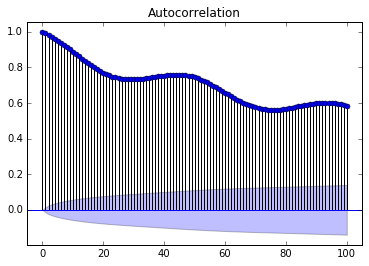

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.mean_count, lags=100)
print data.mean_count.autocorr(lag=4) 

In [102]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train.mean_count, (4, 0)).fit()
pred = model.predict(train_75, train_75+test_25-1)

In [128]:
y_test = test[['mean_count']]
y_pred = pd.DataFrame(pred, columns=['pred'])

output = pd.concat([y_test,y_pred], axis=1)
output.head()

,mean_count,pred
date_time,,
2016-03-17 14:30:00,8.000000,7.968656
2016-03-17 15:00:00,8.000000,7.928921
2016-03-17 15:30:00,8.000000,7.888583
2016-03-17 16:00:00,8.866667,7.847719
2016-03-17 16:30:00,9.000000,7.806820


In [129]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.9567372479600387